# HandWritten Digit Recognition

***1. Screen capture***<br>
***2. Generate dataset and load it***<br>
***3. Fit the model using SVC and calculate accuracy***<br>
***4. Prediction of image drawn in paint***

# 1.Screen Capture

In [1]:
import pyscreenshot as pys
import time

**getting bbox co-ordinates**

In [2]:
import pyautogui
import keyboard

def main():
    # Move mouse to starting coordinates (0, 0)
    pyautogui.moveTo(0, 0)
    print("Mouse moved to (0, 0). Press 's' to capture coordinates.")

    # Wait for the user to press 's' key
    keyboard.wait('s')

    # Get current mouse position
    current_mouse_x, current_mouse_y = pyautogui.position()

    # Print the captured coordinates
    print(f"Captured Coordinates - Mouse X: {current_mouse_x}, Mouse Y: {current_mouse_y}")

if __name__ == "__main__":
    main()


Mouse moved to (0, 0). Press 's' to capture coordinates.
Captured Coordinates - Mouse X: 836, Mouse Y: 885


**x1:167,y1:448;x2:1369,y2:1370**

In [35]:
# import pyscreenshot as ImageGrab
# import time
# images_folder=f"captured_images/{file_path}/" here file path is 0,1,2,.....9
  
#for i in range(0,100):
  # time.sleep(3)
  # im=ImageGrab.grab(bbox=(149,422,836,885)) #x1,y1,x2,y2
  # print("saved......",i)
 #  im.save(images_folder+str(i)+'.png')
  # print("clear screen now and redraw now........")


**the above code is used for a set of images creation**

# 2.Generate Dataset

In [70]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

# Load Dataset

In [71]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
671,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**total 1000 images 785 px fitted into dataset**

# Separating dependent and independent variables:

## Then we have to separate the dependent (Y) and the independent variable (X). The pixel value (between 0 and 1) will be our independent variable.Each digit is represented by a massive amount of 0 and 1. Our digit (from 0 to 9) will be our dependent variable.

In [74]:
X = data.drop(["label"],axis=1)
Y= data["label"]

**preview of one image using matplotlib**

4


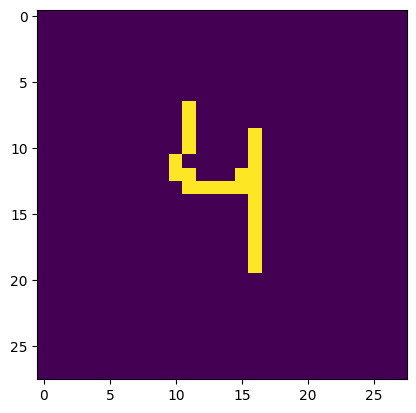

In [75]:

import matplotlib.pyplot as plt
import cv2
idx = 474
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)


# Train-Test Split

In [76]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# 3.Fit model using svc and also saving the model in joblib

In [77]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

### calculate accuracy

In [78]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.965


**that is our model predicts the images 96 out of 100 correctly** 

# Live Prediction

In [1]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
images_folder="img/"
  
while True:
   img=ImageGrab.grab(bbox=(149,422,836,885))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100: 
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

C:\Users\vasu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\vasu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\vasu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\vasu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\vasu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


KeyboardInterrupt: 